<a href="https://colab.research.google.com/github/asyhar22/sqlite/blob/main/Analisa_Penjualan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analisa Data Penjualan Lagu berdasarkan Database Chinook**

### **Chinook Database**
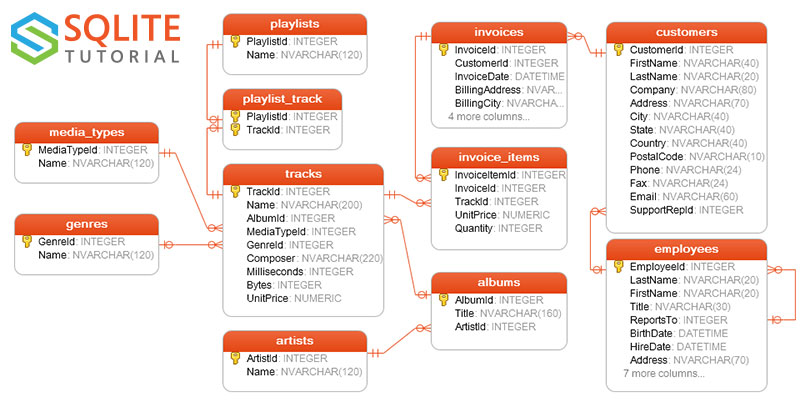

### **Menyiapkan Dataframe**

**Menghubungkan Google Colab dengan Google Drive agar bisa mengakses file dan direktori**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Memuat Database yang tersimpan di direktori Google Drive**

In [2]:
import sqlite3
conn = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/db/chinook.db')

**Membuat SQL Query untuk menarik kolom-kolom tertentu yang akan dijadikan sebagai Data Frame**

In [3]:
sql = '''
	SELECT INVI.InvoiceLineId, INV.InvoiceDate, TR.name as TrackName, TR.Composer, GR.name as Genre, INVI.UnitPrice, INVI.Quantity, INVI.UnitPrice*INVI.Quantity as Sales
	FROM invoice_items INVI
	JOIN invoices INV on INVI.InvoiceId = INV.InvoiceId
	JOIN tracks TR on INVI.TrackId = TR.TrackId 
	JOIN genres GR on TR.GenreId = GR.GenreId
'''

**Membuat Data Frame dari Database**

In [4]:
import pandas as pd
df = pd.read_sql(sql,conn)
df.head()

,InvoiceLineId,InvoiceDate,TrackName,Composer,Genre,UnitPrice,Quantity,Sales
0,1,2009-01-01 00:00:00,Balls to the Wall,None,Rock,0.99,1,0.99
1,2,2009-01-01 00:00:00,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Rock,0.99,1,0.99
2,3,2009-01-02 00:00:00,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99,1,0.99
3,4,2009-01-02 00:00:00,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99,1,0.99
4,5,2009-01-02 00:00:00,Evil Walks,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99,1,0.99


### **PERTANYAAN 1 :** Tim sales ingin mengetahui performa bulanan atas penjualan track di seluruh gerai

**Menambahkan kolom bulan dan tahun pada Data Frame**

In [5]:
df['InvoiceMonth'] = pd.DatetimeIndex(df['InvoiceDate']).month_name()
df['InvoiceYear'] = pd.DatetimeIndex(df['InvoiceDate']).year
df.head()

,InvoiceLineId,InvoiceDate,TrackName,Composer,Genre,UnitPrice,Quantity,Sales,InvoiceMonth,InvoiceYear
0,1,2009-01-01 00:00:00,Balls to the Wall,None,Rock,0.99,1,0.99,January,2009
1,2,2009-01-01 00:00:00,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Rock,0.99,1,0.99,January,2009
2,3,2009-01-02 00:00:00,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99,1,0.99,January,2009
3,4,2009-01-02 00:00:00,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99,1,0.99,January,2009
4,5,2009-01-02 00:00:00,Evil Walks,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99,1,0.99,January,2009


**Memilih kolom-kolom yang relevan dengan pertanyaan**

In [6]:
df = df[['InvoiceYear','InvoiceMonth','TrackName','Composer','Genre','Sales']]
df

,InvoiceYear,InvoiceMonth,TrackName,Composer,Genre,Sales
0,2009,January,Balls to the Wall,None,Rock,0.99
1,2009,January,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Rock,0.99
2,2009,January,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99
3,2009,January,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99
4,2009,January,Evil Walks,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99
...,...,...,...,...,...,...
2235,2013,December,Looking For Love,Sykes,Metal,0.99
2236,2013,December,Sweet Lady Luck,Vandenberg,Metal,0.99
2237,2013,December,Feirinha da Pavuna/Luz do Repente/Bagaço da La...,"Arlindo Cruz/Franco/Marquinhos PQD/Negro, Jove...",Latin,0.99
2238,2013,December,Samba pras moças,Grazielle/Roque Ferreira,Latin,0.99


### **Jawaban untuk Pertanyaan 1**

**Mengelompokkan jumlah penjualan berdasarkan tahun dan bulan**

In [7]:
monthly_sales_pivot = pd.pivot_table(data=df, index='InvoiceYear', columns='InvoiceMonth', values='Sales', aggfunc='sum')
monthly_sales_pivot = monthly_sales_pivot[['January','February','March','April','May','June','July','August','September','October','November','December']]
monthly_sales_pivot

InvoiceMonth,January,February,March,April,May,June,July,August,September,October,November,December
InvoiceYear,,,,,,,,,,,,
2009,35.64,37.62,37.62,37.62,37.62,37.62,37.62,37.62,37.62,37.62,37.62,37.62
2010,52.62,46.62,44.62,37.62,37.62,37.62,37.62,37.62,36.63,37.62,37.62,37.62
2011,37.62,37.62,37.62,51.62,42.62,50.62,37.62,37.62,37.62,37.62,23.76,37.62
2012,37.62,37.62,37.62,37.62,37.62,37.62,39.62,47.62,46.71,42.62,37.62,37.62
2013,37.62,27.72,37.62,33.66,37.62,37.62,37.62,37.62,37.62,37.62,49.62,38.62


**Membuat visualisasi data**

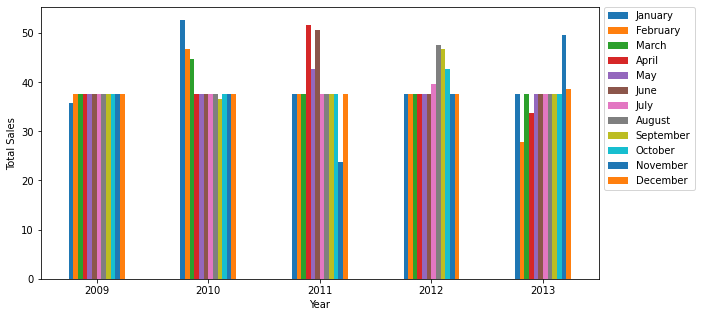

In [8]:
ax = monthly_sales_pivot.plot(kind='bar', figsize=(10,5), ylabel = 'Total Sales', xlabel = 'Year', rot=0)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

### **Jawaban tambahan untuk Pertanyaan 1**

**Mengelompokkan jumlah penjualan berdasarkan tahun**

In [9]:
monthly_sales = df.groupby(['InvoiceYear']).sum().reset_index()
monthly_sales.sample(5)

,InvoiceYear,Sales
0,2009,449.46
1,2010,481.45
4,2013,450.58
2,2011,469.58
3,2012,477.53


**Membuat Visualisasi Data**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

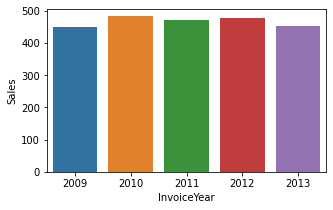

In [19]:
plt.figure(figsize=(5,3))
sns.barplot(x=monthly_sales['InvoiceYear'].astype('str'), y='Sales', data=monthly_sales)

plt.show()

### **PERTANYAAN 2 :** Setelah mengetahui bagaimana performa bulanannya, tim sales juga ingin mengetahui track mana yang menyumbang transaksi terbesar di tahun 2012

**Melihat kembali data penjualan**

In [12]:
df

,InvoiceYear,InvoiceMonth,TrackName,Composer,Genre,Sales
0,2009,January,Balls to the Wall,None,Rock,0.99
1,2009,January,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Rock,0.99
2,2009,January,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99
3,2009,January,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99
4,2009,January,Evil Walks,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99
...,...,...,...,...,...,...
2235,2013,December,Looking For Love,Sykes,Metal,0.99
2236,2013,December,Sweet Lady Luck,Vandenberg,Metal,0.99
2237,2013,December,Feirinha da Pavuna/Luz do Repente/Bagaço da La...,"Arlindo Cruz/Franco/Marquinhos PQD/Negro, Jove...",Latin,0.99
2238,2013,December,Samba pras moças,Grazielle/Roque Ferreira,Latin,0.99


### **Jawaban untuk Pertanyaan 2**

**Melakukan seleksi pada penjualan 2012**

In [13]:
sales_2012 = df[df['InvoiceYear'] == 2012]
sales_2012.sample(5)

,InvoiceYear,InvoiceMonth,TrackName,Composer,Genre,Sales
1423,2012,February,Night Flight,John Paul Jones/Robert Plant,Rock,0.99
1376,2012,January,Run To The Hills,Steve Harris,Rock,0.99
1653,2012,August,Cathedral,Alex Van Halen/David Lee Roth/Edward Van Halen...,Rock,0.99
1687,2012,October,Imagine,None,Pop,0.99
1706,2012,October,Die Walküre: The Ride of the Valkyries,Richard Wagner,Classical,0.99


**Mengelompokkan dan mengurutkan penjualan selama 2012 berdasarkan judul lagu**

In [14]:
sales_2012 = sales_2012.groupby(['TrackName']).sum().sort_values(by='Sales', ascending=False).reset_index()
sales_2012

,TrackName,InvoiceYear,Sales
0,"""?""",2012,1.99
1,"There's No Place Like Home, Pt. 3",2012,1.99
2,Safety Training,2012,1.99
3,Orientation,2012,1.99
4,"Past, Present, and Future",2012,1.99
...,...,...,...
434,Heaven Can Wait,2012,0.99
435,Heartbreaker,2012,0.99
436,Heart Of Lothian: Wide Boy / Curtain Call,2012,0.99
437,Hawkmoon 269,2012,0.99


**Membuat Visualisasi Data**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

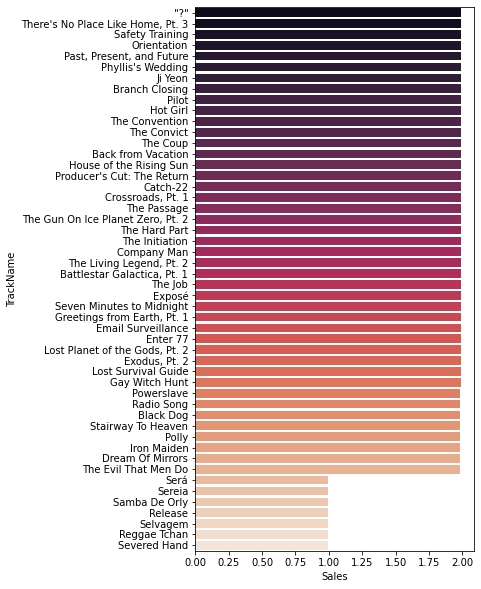

In [16]:
plt.figure(figsize=(5,10))
sns.barplot(x='Sales', y='TrackName', data=sales_2012.iloc[:50], palette='rocket')

plt.show()